# Paris Olumpic 2024 EDA

24566009 Divyansh Tripathi, ML assignment 1 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/olympic-summer-games-paris-2024/nocs.csv
/kaggle/input/olympic-summer-games-paris-2024/coaches.csv
/kaggle/input/olympic-summer-games-paris-2024/medallists.csv
/kaggle/input/olympic-summer-games-paris-2024/technical_officials.csv
/kaggle/input/olympic-summer-games-paris-2024/teams.csv
/kaggle/input/olympic-summer-games-paris-2024/torch_route.csv
/kaggle/input/olympic-summer-games-paris-2024/schedules.csv
/kaggle/input/olympic-summer-games-paris-2024/athletes.csv
/kaggle/input/olympic-summer-games-paris-2024/venues.csv
/kaggle/input/olympic-summer-games-paris-2024/schedules_preliminary.csv
/kaggle/input/olympic-summer-games-paris-2024/medals_total.csv
/kaggle/input/olympic-summer-games-paris-2024/events.csv
/kaggle/input/olympic-summer-games-paris-2024/medals.csv
/kaggle/input/olympic-summer-games-paris-2024/results/Rowing.csv
/kaggle/input/olympic-summer-games-paris-2024/results/Table Tennis.csv
/kaggle/input/olympic-summer-games-paris-2024/results/Water Polo.csv
/kaggle/

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from datetime import datetime

## Import dataset

In [3]:
df_athletes = pd.read_csv("/kaggle/input/olympic-summer-games-paris-2024/athletes.csv")
df_athletes.head()

,code,name,name_short,name_tv,gender,function,country_code,country,country_long,nationality,...,family,lang,coach,reason,hero,influence,philosophy,sporting_relatives,ritual,other_sports
0,1532872,ALEKSANYAN Artur,ALEKSANYAN A,Artur ALEKSANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,"Father, Gevorg Aleksanyan","Armenian, English, Russian","Gevorg Aleksanyan (ARM), father",He followed his father and his uncle into the ...,"Footballer Zinedine Zidane (FRA), World Cup wi...","His father, Gevorg Aleksanyan","""Wrestling is my life."" (mediamax.am. 18 May 2...",NaN,NaN,NaN
1,1532873,AMOYAN Malkhas,AMOYAN M,Malkhas AMOYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,NaN,Armenian,NaN,NaN,NaN,NaN,"""To become a good athlete, you first have to b...","Uncle, Roman Amoyan (wrestling), 2008 Olympic ...",NaN,NaN
2,1532874,GALSTYAN Slavik,GALSTYAN S,Slavik GALSTYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,NaN,Armenian,Personal: Martin Alekhanyan (ARM).<br>National...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1532944,HARUTYUNYAN Arsen,HARUTYUNYAN A,Arsen HARUTYUNYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,"Wife, Diana (married October 2022). Daughter, ...",Armenian,National: Habetnak Kurghinyan,While doing karate he noticed wrestlers traini...,"Wrestler Armen Nazaryan (ARM, BUL), two-time O...",NaN,"“Nothing is impossible, set goals in front of ...",NaN,NaN,NaN
4,1532945,TEVANYAN Vazgen,TEVANYAN V,Vazgen TEVANYAN,Male,Athlete,ARM,Armenia,Armenia,Armenia,...,"Wife, Sona (married November 2023)","Armenian, Russian",National: Habetnak Kurghinyan (ARM),“My family did not like wrestling very much. A...,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_medallists = pd.read_csv("/kaggle/input/olympic-summer-games-paris-2024/medallists.csv")
df_medallists.head()

,medal_date,medal_type,medal_code,name,gender,country_code,country,country_long,nationality,team,team_gender,discipline,event,event_type,url_event,birth_date,code_athlete,code_team
0,2024-07-27,Gold Medal,1.0,EVENEPOEL Remco,Male,BEL,Belgium,Belgium,Belgium,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,2000-01-25,1903136,NaN
1,2024-07-27,Silver Medal,2.0,GANNA Filippo,Male,ITA,Italy,Italy,Italy,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1996-07-25,1923520,NaN
2,2024-07-27,Bronze Medal,3.0,van AERT Wout,Male,BEL,Belgium,Belgium,Belgium,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1994-09-15,1903147,NaN
3,2024-07-27,Gold Medal,1.0,BROWN Grace,Female,AUS,Australia,Australia,Australia,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1992-07-07,1940173,NaN
4,2024-07-27,Silver Medal,2.0,HENDERSON Anna,Female,GBR,Great Britain,Great Britain,Great Britain,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1998-11-14,1912525,NaN


In [5]:
df_team = pd.read_csv("/kaggle/input/olympic-summer-games-paris-2024/teams.csv")
df_team.head()

,code,team,team_gender,country_code,country,country_long,discipline,disciplines_code,events,athletes,coaches,athletes_codes,num_athletes,coaches_codes,num_coaches
0,ARCMTEAM3---CHN01,People's Republic of China,M,CHN,China,People's Republic of China,Archery,ARC,Men's Team,"['KAO Wenchao', 'LI Zhongyuan', 'WANG Yan']",NaN,"['1913366', '1913367', '1913369']",3.0,NaN,NaN
1,ARCMTEAM3---COL01,Colombia,M,COL,Colombia,Colombia,Archery,ARC,Men's Team,"['ARCILA Santiago', 'ENRIQUEZ Jorge', 'HERNAND...",NaN,"['1935642', '1543412', '1935644']",3.0,NaN,NaN
2,ARCMTEAM3---FRA01,France,M,FRA,France,France,Archery,ARC,Men's Team,"['ADDIS Baptiste', 'CHIRAULT Thomas', 'VALLADO...",NaN,"['1541270', '1541272', '1541275']",3.0,NaN,NaN
3,ARCMTEAM3---GBR01,Great Britain,M,GBR,Great Britain,Great Britain,Archery,ARC,Men's Team,"['HALL Conor', 'HALL Tom', 'WISE Alex']",NaN,"['1560988', '1560989', '1561003']",3.0,NaN,NaN
4,ARCMTEAM3---IND01,India,M,IND,India,India,Archery,ARC,Men's Team,"['BOMMADEVARA Dhiraj', 'JADHAV Pravin Ramesh',...",NaN,"['1546108', '1546112', '1546110']",3.0,NaN,NaN


## Basic Data Exploration

get information about the dataset

In [6]:
df_athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11110 entries, 0 to 11109
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   code                11110 non-null  int64  
 1   name                11110 non-null  object 
 2   name_short          11110 non-null  object 
 3   name_tv             11110 non-null  object 
 4   gender              11110 non-null  object 
 5   function            11110 non-null  object 
 6   country_code        11110 non-null  object 
 7   country             11110 non-null  object 
 8   country_long        11110 non-null  object 
 9   nationality         11107 non-null  object 
 10  nationality_full    11107 non-null  object 
 11  nationality_code    11107 non-null  object 
 12  height              11110 non-null  int64  
 13  weight              11108 non-null  float64
 14  disciplines         11110 non-null  object 
 15  events              11110 non-null  object 
 16  birt

Check for missing values for all columns

In [7]:
df_athletes.isnull().sum()

code                      0
name                      0
name_short                0
name_tv                   0
gender                    0
function                  0
country_code              0
country                   0
country_long              0
nationality               3
nationality_full          3
nationality_code          3
height                    0
weight                    2
disciplines               0
events                    0
birth_date                0
birth_place            2383
birth_country          1635
residence_place        4306
residence_country      2822
nickname               8144
hobbies                6903
occupation             1526
education              5572
family                 5549
lang                    505
coach                  2888
reason                 5264
hero                   7795
influence              8955
philosophy             8327
sporting_relatives     8592
ritual                10253
other_sports          10050
dtype: int64

In [8]:
df_athletes.describe()

,code,height,weight
count,1.111000e+04,11110.000000,11108.000000
mean,1.887406e+06,81.798830,2.211919
std,3.588479e+05,89.508247,13.109608
min,1.532872e+06,0.000000,0.000000
25%,1.888182e+06,0.000000,0.000000
50%,1.918839e+06,0.000000,0.000000
75%,1.948950e+06,177.000000,0.000000
max,9.460001e+06,222.000000,113.000000


In [9]:
df_athletes['country'].value_counts()

country
United States    619
France           600
Australia        475
Germany          457
Japan            431
                ... 
Andorra            2
Nauru              1
Liechtenstein      1
Somalia            1
Belize             1
Name: count, Length: 206, dtype: int64

In [10]:
df_athletes['disciplines'].value_counts()

disciplines
['Athletics']                                2018
['Swimming']                                  836
['Football']                                  553
['Rowing']                                    493
['Hockey']                                    415
['Handball']                                  386
['Judo']                                      378
['Shooting']                                  342
['Sailing']                                   330
['Rugby Sevens']                              317
['Volleyball']                                311
['Wrestling']                                 291
['Basketball']                                287
['Water Polo']                                286
['Fencing']                                   260
['Boxing']                                    248
['Equestrian']                                242
['Canoe Sprint']                              239
['Cycling Track']                             224
['Artistic Gymnastics']               

## Data Visualization

In [11]:
df_athletes['birth_date'].head()

0    1991-10-21
1    1999-01-22
2    1996-12-21
3    1999-11-22
4    1999-10-27
Name: birth_date, dtype: object

In [12]:
#Convert 'birthdate' to datetime
df_athletes['birth_date'] = pd.to_datetime(df_athletes['birth_date'], format='%Y-%m-%d')

# Calculate age
df_athletes['age'] = (pd.to_datetime('today') - df_athletes['birth_date']).dt.days // 365

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


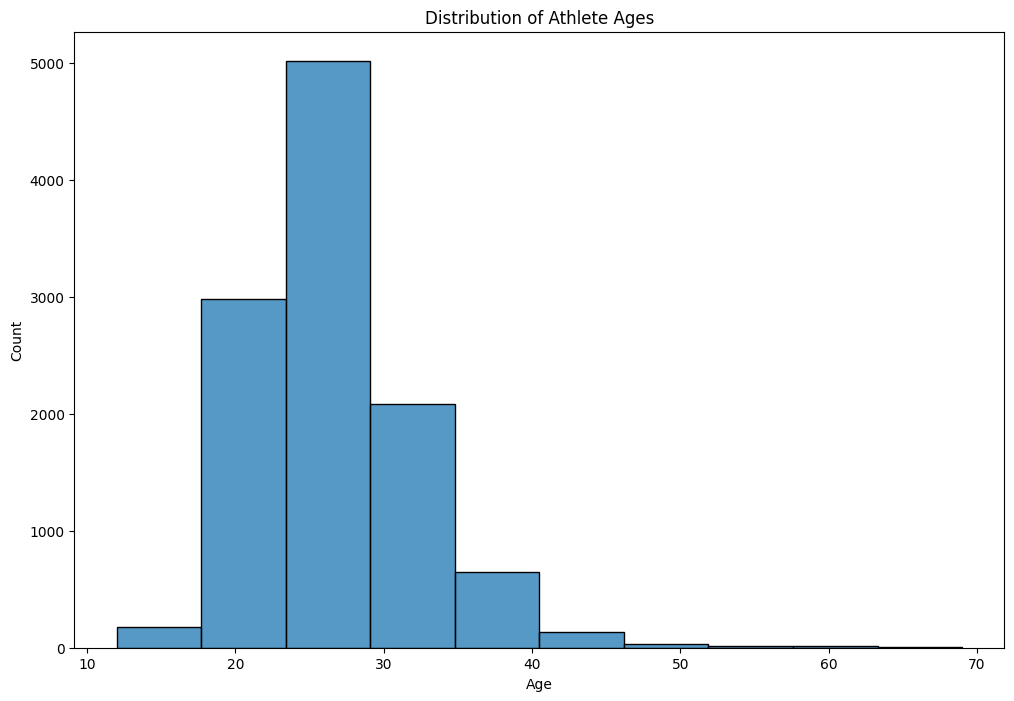

In [13]:
plt.figure(figsize = (12,8))
sns.histplot(df_athletes['age'], bins = 10, kde = False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Athlete Ages')
    
plt.show()

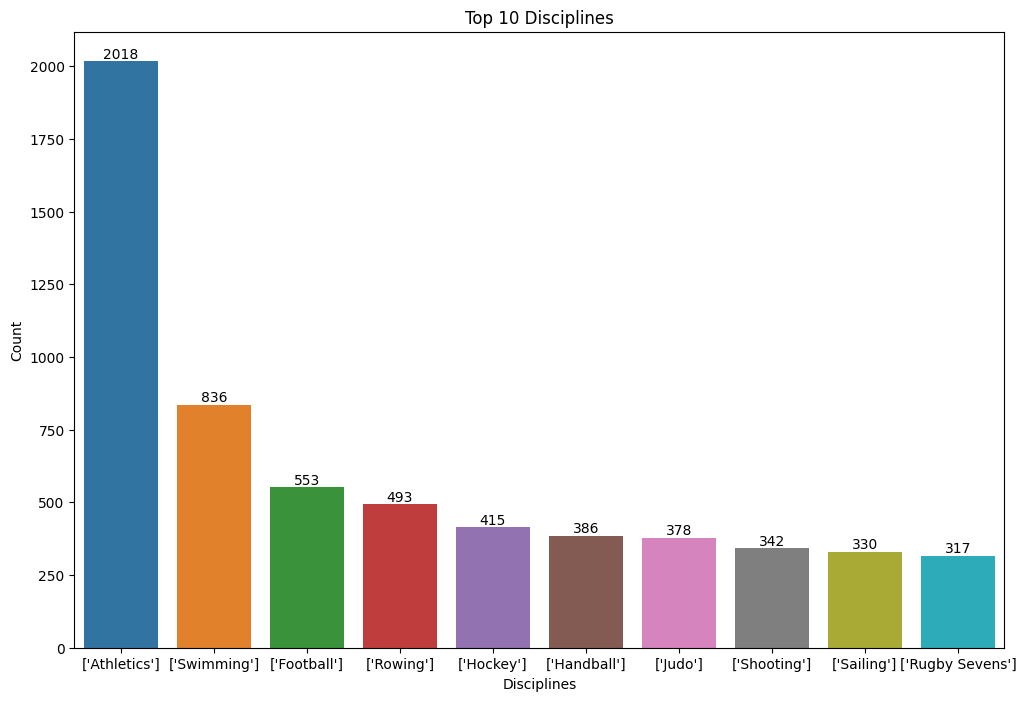

In [14]:
top_10_disciplines = df_athletes['disciplines'].value_counts().head(10)

plt.figure(figsize = (12,8))
ax = sns.barplot(x=top_10_disciplines.index, y=top_10_disciplines.values)
ax.set_xlabel('Disciplines')
ax.set_ylabel('Count')
ax.set_title('Top 10 Disciplines')

# Add the value labels
for p in ax.patches:
    value = f'{p.get_height():.0f}'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, value, ha='center', va='bottom', fontsize=10)
    
plt.show()

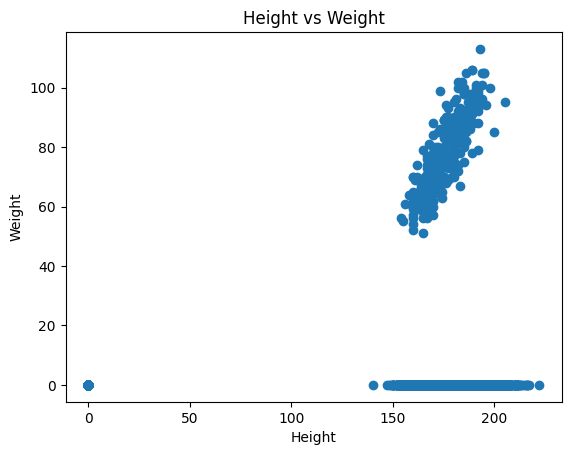

In [15]:
plt.scatter(df_athletes['height'], df_athletes['weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.show()

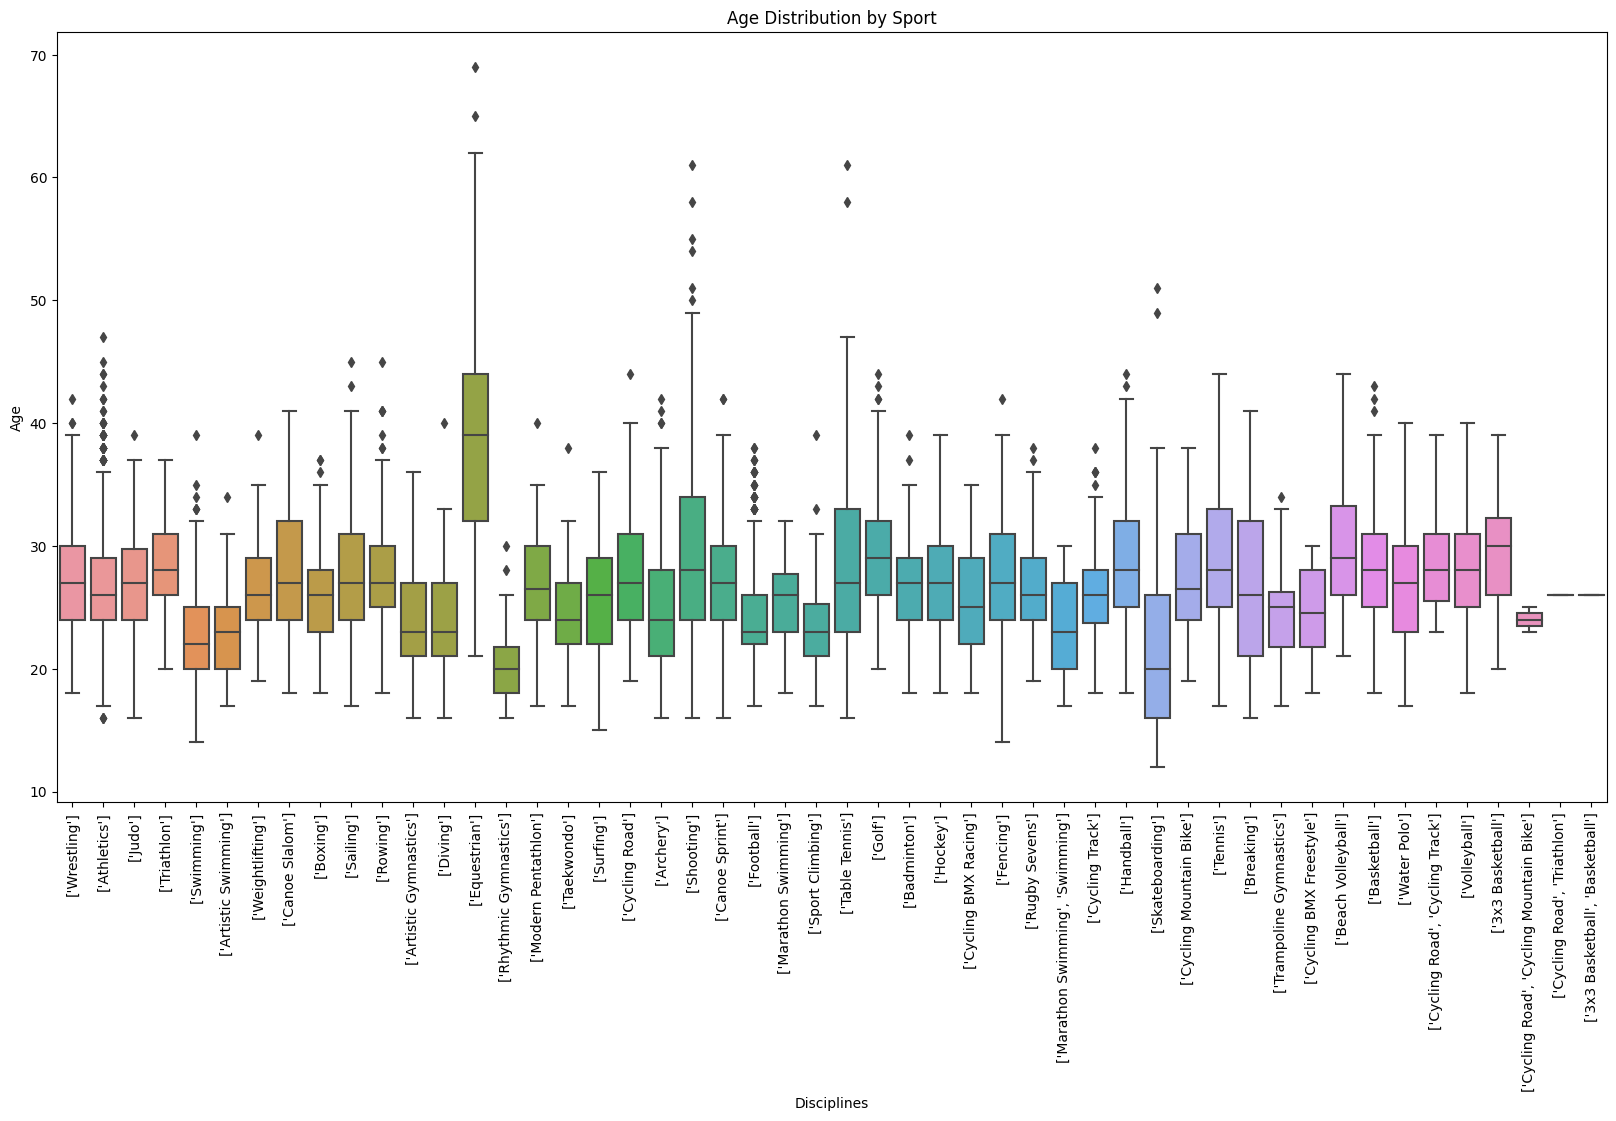

In [16]:
plt.figure(figsize = (20,10))
sns.boxplot(x='disciplines', y = 'age', data = df_athletes)
plt.xlabel('Disciplines')
plt.ylabel('Age')
plt.title('Age Distribution by Sport')
plt.xticks(rotation=90)
plt.show()

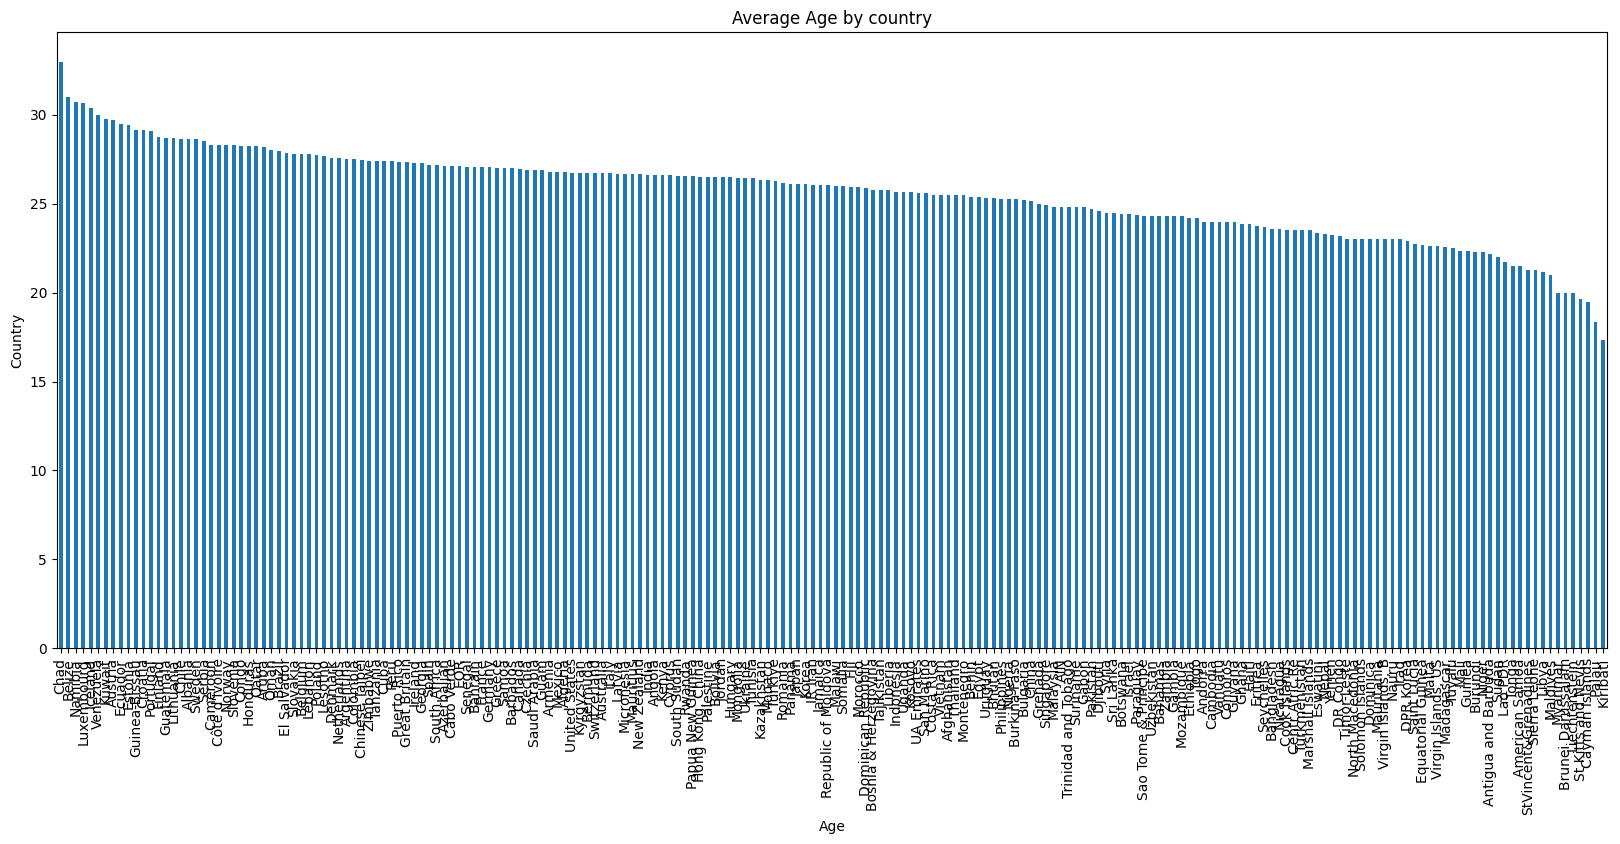

In [17]:
grouped_age = df_athletes.groupby('country')['age'].mean()
grouped_age_sorted = grouped_age.sort_values(ascending = False)

plt.figure(figsize = (20,8))
grouped_age_sorted.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Country')
plt.title('Average Age by country')
plt.xticks(rotation = 90)
plt.show()

In [18]:
grouped_age_sorted.head()


country
Chad          33.000000
Belize        31.000000
Namibia       30.750000
Luxembourg    30.692308
Iceland       30.400000
Name: age, dtype: float64

In [19]:
grouped_age_sorted.tail()

country
Liechtenstein         20.000000
St Kitts and Nevis    19.666667
Cayman Islands        19.500000
Palau                 18.333333
Kiribati              17.333333
Name: age, dtype: float64

In [20]:
grouped_medallists_sorted = df_medallists.groupby('country')['medal_type'].count().sort_values(ascending = False)
df_grouped_medallists = grouped_medallists_sorted.reset_index(name='total_medals')
print(df_grouped_medallists)

          country  total_medals
0   United States           330
1          France           186
2           China           168
3   Great Britain           161
4       Australia           123
..            ...           ...
87           Peru             1
88         Panama             1
89       Pakistan             1
90       Mongolia             1
91         Zambia             1

[92 rows x 2 columns]


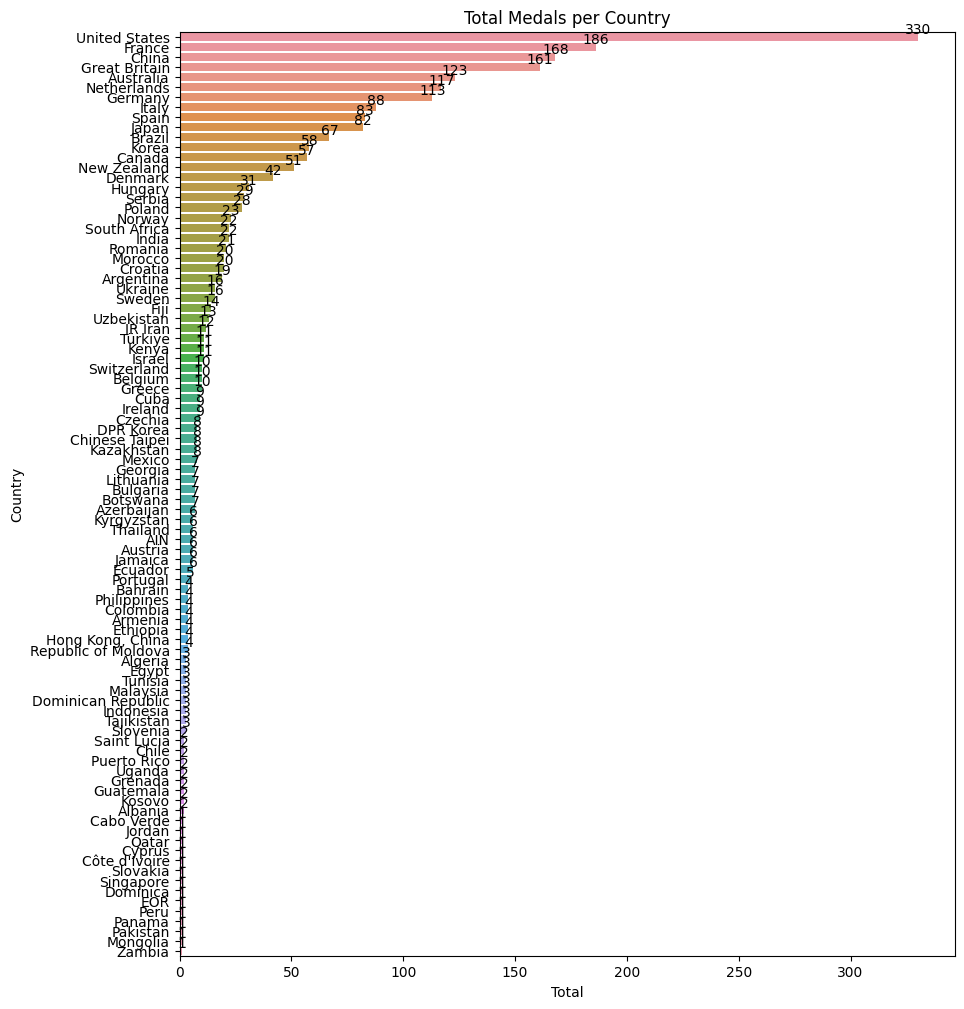

In [21]:
# Assuming df_medallists is your DataFrame
plt.figure(figsize=(10, 12))
ax = sns.barplot(x=df_grouped_medallists['total_medals'], y=df_grouped_medallists['country'])
ax.set_ylabel('Country')
ax.set_xlabel('Total')
ax.set_title('Total Medals per Country')

# Add the value labels
for p in ax.patches:
    value = f'{p.get_width():.0f}'
    y = p.get_y() + p.get_height() / 2
    x = p.get_width()
    ax.text(x, y, value, ha='center', va='bottom', fontsize=10)
    
plt.show()

## Feature Engineering

In [22]:
df_athletes['bmi'] = df_athletes['weight'] / (df_athletes['height'] / 100)**2
df_athletes['bmi'].dropna()

5        0.0
7        0.0
8        0.0
12       0.0
25       0.0
        ... 
11102    0.0
11104    0.0
11105    0.0
11107    0.0
11108    0.0
Name: bmi, Length: 5078, dtype: float64

In [23]:
athlete_counts = df_athletes.groupby('country')['code'].nunique()
athlete_counts

country
AIN                   32
Afghanistan            6
Albania                8
Algeria               46
American Samoa         2
                      ..
Virgin Islands, B      4
Virgin Islands, US     5
Yemen                  4
Zambia                31
Zimbabwe               7
Name: code, Length: 206, dtype: int64

In [24]:
merged_df_grouped_medallists = df_grouped_medallists.join(athlete_counts, on='country')
merged_df_grouped_medallists = merged_df_grouped_medallists.rename(columns = {'code' : 'player_count'})
merged_df_grouped_medallists

,country,total_medals,player_count
0,United States,330,619
1,France,186,600
2,China,168,398
3,Great Britain,161,342
4,Australia,123,475
...,...,...,...
87,Peru,1,26
88,Panama,1,8
89,Pakistan,1,7
90,Mongolia,1,32


In [25]:
merged_df_grouped_medallists['medals_per_player'] = merged_df_grouped_medallists['total_medals'] / merged_df_grouped_medallists['player_count']
merged_df_grouped_medallists = merged_df_grouped_medallists.sort_values('medals_per_player', ascending = False)
merged_df_grouped_medallists

,country,total_medals,player_count,medals_per_player
39,DPR Korea,8,14,0.571429
0,United States,330,619,0.533118
70,Saint Lucia,2,4,0.500000
46,Botswana,7,14,0.500000
3,Great Britain,161,342,0.470760
...,...,...,...,...
91,Zambia,1,31,0.032258
69,Slovenia,3,95,0.031579
90,Mongolia,1,32,0.031250
86,EOR,1,37,0.027027


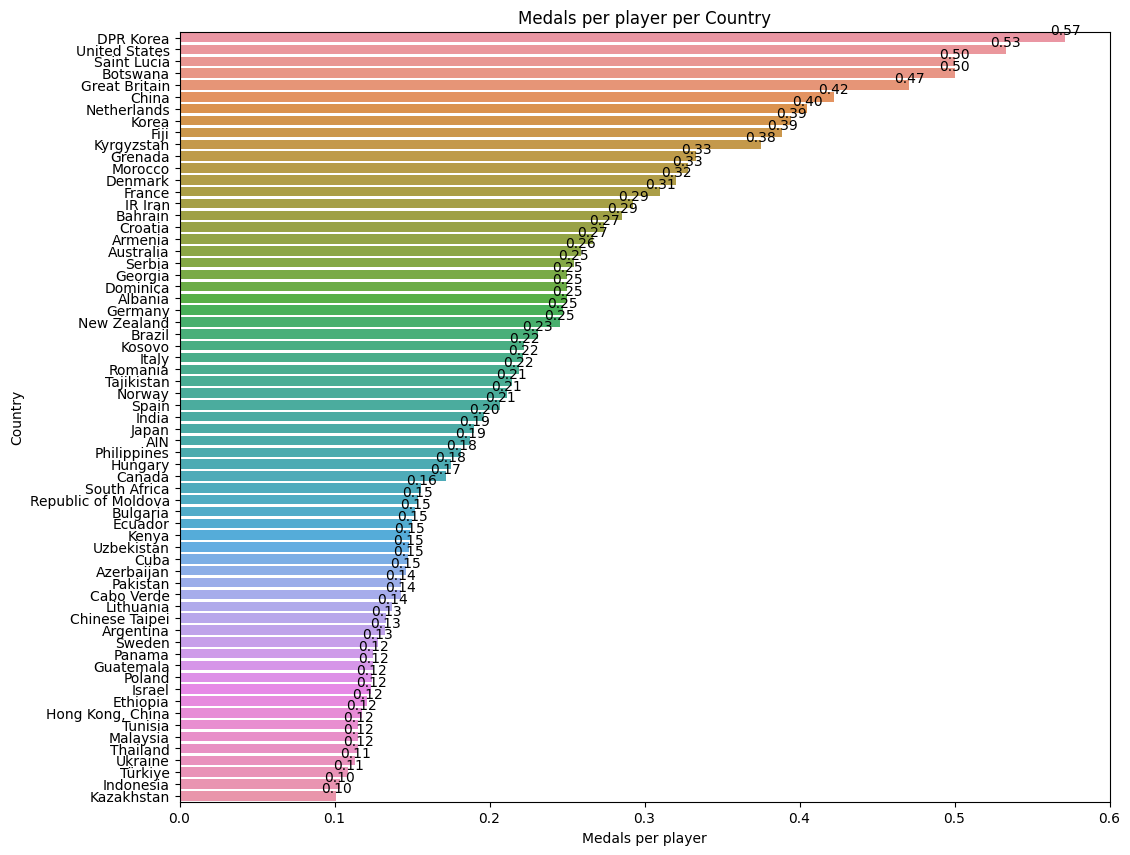

In [26]:
# Filter the ratio of medals per player that is > 0.1
filtered_df = merged_df_grouped_medallists[merged_df_grouped_medallists['medals_per_player'] > 0.1]

# Assuming df_medallists is your DataFrame
plt.figure(figsize=(12, 10))
ax = sns.barplot(x=filtered_df['medals_per_player'], y=filtered_df['country'])
ax.set_ylabel('Country')
ax.set_xlabel('Medals per player')
ax.set_title('Medals per player per Country')

# Add the value labels
for p in ax.patches:
    value = f'{p.get_width():.2f}'
    y = p.get_y() + p.get_height() / 2
    x = p.get_width()
    ax.text(x, y, value, ha='center', va='bottom', fontsize=10)
    
plt.show()

## Correlation Matrix

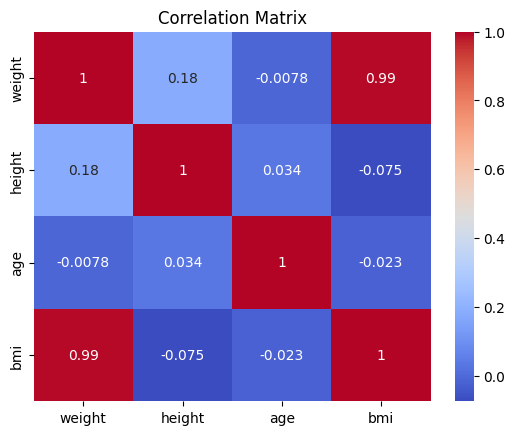

In [27]:
correlation_matrix =df_athletes[['weight', 'height', 'age', 'bmi']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()